# Leaky Integrator Firing Rates

## Introduction

In this notebook, we model a basic Leaky Integrator for modelling activation and firing rates of a single neuron. The basic differential equation is given as $$\tau \frac{\partial V}{\partial t} = -V + E_L + R_mI_e.$$ We use Eulerian integration to estimate the dynamics of the model over time, and set a threshold for firing, thus simulating basic neuronal activation, without a recovery period.

## Eulerian Integration
This function takes care of the integration and firing for our model. Instead of setting a maximum time-period, $T$, for our integration, we instead set a minimum required number of spikes, $N \in \mathbb{N}$, and integrate until that number is reached. We also save the history of the dynamics for display purposes.


In [0]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

def leaky_integrate_fire(f0, N, V_th=1, tau=1, E_L=1,
                             R_m=1, I_e=1, h=1):
    '''
        Simple leaky integrate and fire model. Perform Eulerian
        integration such that the number of spikes is equal to N.
    '''
    V = f0
    history = []
    spikes = []
    while np.sum(spikes) < N:
        history.append(V)
        V = V + (h/tau) * (-V + E_L + R_m*I_e)
        if V >= V_th:
            V = f0
            spikes.append(1)
            continue

    return V, history, spikes

## Voltage Dynamics of the Leaky Integrator

First, we plot the dynamics for a small number of spikes, to visualize what is happening. We allow each of the parameters, $E_L, R_M, V_{th}, \tau, V_0, H$ and $N$ to be configured by the user. For now, let $I_e$ be constant, and also specified by the user.

**To regenerate the plot with new parameters, press the play button in the upper left hand corner below**

3 3


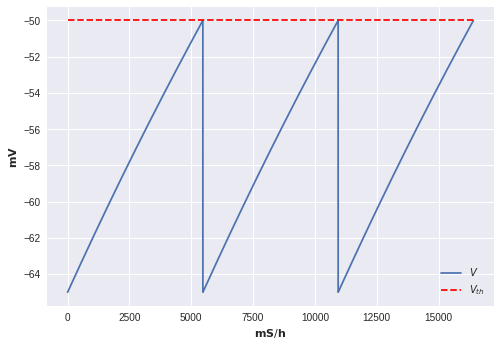

In [56]:
#@title ## Parameters
#@markdown **E<sub>L** - Resting Potential of Model Cell, in **mV**
E_L = -65 #@param {type:"slider", min:-100, max:-1, step:1}
#@markdown **R<sub>M** - Membrane Resistance, in **MOhms**
R_m = 90 #@param {type:"slider", min:50, max:200, step:1}
#@markdown **V<sub>th** - Fire Threshold of Model Cell, in **mV**
V_th = -50 #@param {type:"slider", min:-100, max:-1, step:1}
#@markdown **𝜏** - Resting Potential of Model Cell, in **mV**
tau = 30 #@param {type:"slider", min:1, max:100, step:1}
#@markdown **V<sub>0</sub>/V<sub>reset** - Starting/Resting Voltage in **mV**
V_0 = -65 #@param {type:"slider", min:-100, max:-1, step:1}
#@markdown **h** - Δ*t*, interval for eulerian integration
H = .001 #@param {type:"slider", min:0.001, max:1, step:0.001}
#@markdown **N** - Number of Minimum Required Spikes
N = 3 #@param {type:"slider", min:1, max:10000, step:1}
#@markdown **min(I<sub>e</sub>)** - Current , in **nA**
I_e = 1 #@param {type:"slider", min:0, max:10, step:0.1}

V, history, spikes = leaky_integrate_fire(V_0, N, V_th=V_th, tau=tau, E_L=E_L,
                                         R_m=R_m,I_e=I_e,h=H)
sb.set()
print(N,len(spikes))
plt.plot(np.arange(0,len(history)), history)
plt.plot([0,len(history)], [V_th, V_th], 'r--')
plt.xlabel('$\mathbf{mS}/\mathbf{h}$')
plt.ylabel('$\mathbf{mV}$')
plt.legend(['$V$', '$V_{th}$'])
plt.show()

## Average Firing Rate of the Leaky Integrator

Next, we want to measure the firing rate, $r_{isi}$. To do this, we vary $I_e$ along an interval, set a high number of required spikes, $N$ measure the time, $T$, required to see those spikes, and then compute the average firing time $t_{isi} = T/N$. Then, we can compute the firing rate as $r_{isi} = 1/t_{isi}$. We compare with the exact solution $$r_{isi} = \left( \tau_m \ln\left( \frac{R_mI_e+E_L-V_{reset}}{R_mI_e+E_L-V_{th}} \right) \right)$$

**To regenerate the plot with new parameters, press the play button in the upper left hand corner below**

$I_e$=0.0, exact $r_isi$=0.00, estimated $r_isi$=0.00, error=0.00
$I_e$=0.1, exact $r_isi$=0.00, estimated $r_isi$=0.00, error=0.00
$I_e$=0.200, exact $r_isi$=0.018604, estimated $r_isi$=0.018605, error=-0.000001
$I_e$=0.300, exact $r_isi$=0.041105, estimated $r_isi$=0.041102, error=0.000004
$I_e$=0.400, exact $r_isi$=0.061843, estimated $r_isi$=0.061843, error=0.000000
$I_e$=0.500, exact $r_isi$=0.082210, estimated $r_isi$=0.082169, error=0.000041
$I_e$=0.600, exact $r_isi$=0.102431, estimated $r_isi$=0.102354, error=0.000077
$I_e$=0.700, exact $r_isi$=0.122579, estimated $r_isi$=0.122549, error=0.000030
$I_e$=0.800, exact $r_isi$=0.142685, estimated $r_isi$=0.142653, error=0.000032
$I_e$=0.900, exact $r_isi$=0.162765, estimated $r_isi$=0.162602, error=0.000163
$I_e$=1.000, exact $r_isi$=0.182827, estimated $r_isi$=0.182815, error=0.000012
$I_e$=1.100, exact $r_isi$=0.202877, estimated $r_isi$=0.202840, error=0.000037
$I_e$=1.200, exact $r_isi$=0.222918, estimated $r_isi$=0.222717, er

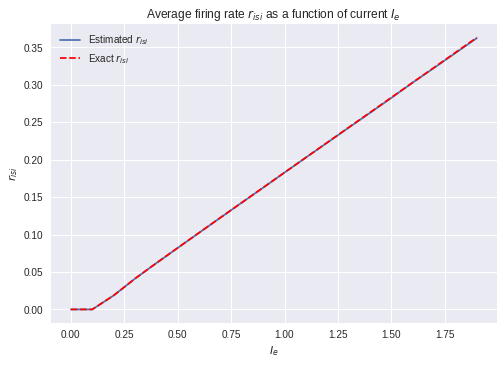

In [64]:
#@title ## Parameters
#@markdown **E<sub>L** - Resting Potential of Model Cell, in **mV**
E_L = -65 #@param {type:"slider", min:-100, max:-1, step:1}
#@markdown **R<sub>M** - Membrane Resistance, in **MOhms**
R_m = 90 #@param {type:"slider", min:50, max:200, step:1}
#@markdown **V<sub>th** - Fire Threshold of Model Cell, in **mV**
V_th = -50 #@param {type:"slider", min:-100, max:-1, step:1}
#@markdown **𝜏** - Resting Potential of Model Cell, in **mV**
tau = 30 #@param {type:"slider", min:1, max:100, step:1}
#@markdown **V<sub>0</sub>/V<sub>reset** - Starting/Resting Voltage in **mV**
V_0 = -65 #@param {type:"slider", min:-100, max:-1, step:1}
#@markdown **h** - Δ*t*, interval for eulerian integration
H = .01 #@param {type:"slider", min:0.001, max:1, step:0.001}
#@markdown **N** - Number of Minimum Required Spikes
N = 100 #@param {type:"slider", min:1, max:10000, step:1}
#@markdown **min(I<sub>e</sub>)** - Lower Bound of Current , in **nA**
I_e_min = 0 #@param {type:"slider", min:0, max:10, step:0.1}
#@markdown **max(I<sub>e</sub>)** - Upper Bound of Current, in **nA**
I_e_max = 2 #@param {type:"slider", min:0.5, max:10, step:0.1}
#@markdown **I<sub>e<sub>rate** - Rate of Interval for Measuring Current, in **nA**
I_e_rate = 0.1 #@param {type:"slider", min:0, max:1, step:0.01}
r_isi = []
g_s = []
for I_e in np.arange(I_e_min, I_e_max, I_e_rate):
    if R_m*I_e <= V_th - E_L:
        print("$I_e$=%.1f, exact $r_isi$=%.2f, estimated $r_isi$=%.2f, error=%.2f" %
          (I_e, 0, 0, 0))
        r_isi.append(0)
        g_s.append(0)
        continue
    gt = 1/(tau*np.log((R_m*I_e+E_L-V_0)/(R_m*I_e+E_L-V_th)))
    g_s.append(gt)
    y, history, spikes = leaky_integrate_fire(V_0, N, V_th=V_th, tau=tau,
                                              E_L=E_L, R_m=R_m, I_e=I_e, h=H)
    t_isi = len(history)/np.sum(spikes)
    print("$I_e$=%.3f, exact $r_isi$=%.6f, estimated $r_isi$=%.6f, error=%.6f" %
          (I_e, gt, (1/t_isi)/H, gt - (1/t_isi)/H ))
    if t_isi > 0:
        r_isi.append(1/t_isi)
    else:
        r_isi.append(0)
# Renormalize
r_isi = np.array(r_isi)/H

sb.set()
plt.plot(np.arange(I_e_min, I_e_max, I_e_rate), np.array(r_isi))
plt.plot(np.arange(I_e_min, I_e_max, I_e_rate), g_s, 'r--')
plt.title('Average firing rate $r_{isi}$ as a function of current $I_e$')
plt.ylabel('$r_{isi}$')
plt.xlabel('$I_e$')
plt.legend(['Estimated $r_{isi}$', 'Exact $r_{isi}$'])
plt.show()
        